In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data 

In [ ]:
df = data.get_data_tiingo('TSLA',  api_key="3601f79afce502a82f275b485b1e01387c34352d")
df.head()

close      high  ...  divCash  splitFactor
symbol date                                         ...                      
TSLA   2017-01-30 00:00:00+00:00  250.63  255.2899  ...      0.0          1.0
       2017-01-31 00:00:00+00:00  251.93  255.8900  ...      0.0          1.0
       2017-02-01 00:00:00+00:00  249.24  253.2000  ...      0.0          1.0
       2017-02-02 00:00:00+00:00  251.55  252.4200  ...      0.0          1.0
       2017-02-03 00:00:00+00:00  251.33  252.1790  ...      0.0          1.0

[5 rows x 12 columns]

In [ ]:
df.tail()

close      high  ...  divCash  splitFactor
symbol date                                         ...                      
TSLA   2022-01-24 00:00:00+00:00  930.00  933.5131  ...      0.0          1.0
       2022-01-25 00:00:00+00:00  918.40  951.2600  ...      0.0          1.0
       2022-01-26 00:00:00+00:00  937.41  987.6900  ...      0.0          1.0
       2022-01-27 00:00:00+00:00  829.10  935.3900  ...      0.0          1.0
       2022-01-28 00:00:00+00:00  846.35  857.5000  ...      0.0          1.0

[5 rows x 12 columns]

In [ ]:
df=df.reset_index()
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2017-01-30 00:00:00+00:00,250.63,255.2899,247.10,252.53,3801074,50.126,51.05798,49.420,50.506,19005370,0.0,1.0
1,TSLA,2017-01-31 00:00:00+00:00,251.93,255.8900,247.70,249.24,4116104,50.386,51.17800,49.540,49.848,20580520,0.0,1.0
2,TSLA,2017-02-01 00:00:00+00:00,249.24,253.2000,249.05,253.05,3958829,49.848,50.64000,49.810,50.610,19794145,0.0,1.0
3,TSLA,2017-02-02 00:00:00+00:00,251.55,252.4200,247.71,248.34,2499775,50.310,50.48400,49.542,49.668,12498875,0.0,1.0
4,TSLA,2017-02-03 00:00:00+00:00,251.33,252.1790,249.68,251.91,2186723,50.266,50.43580,49.936,50.382,10933615,0.0,1.0


In [ ]:
df = df.drop(['date','symbol','adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'],  axis=1)
df.head()

,close,high,low,open,volume
0,250.63,255.2899,247.10,252.53,3801074
1,251.93,255.8900,247.70,249.24,4116104
2,249.24,253.2000,249.05,253.05,3958829
3,251.55,252.4200,247.71,248.34,2499775
4,251.33,252.1790,249.68,251.91,2186723


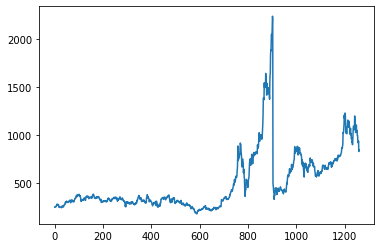

In [ ]:
plt.plot(df.close)
plt.show()

In [ ]:
df

,close,high,low,open,volume
0,250.63,255.2899,247.10,252.53,3801074
1,251.93,255.8900,247.70,249.24,4116104
2,249.24,253.2000,249.05,253.05,3958829
3,251.55,252.4200,247.71,248.34,2499775
4,251.33,252.1790,249.68,251.91,2186723
...,...,...,...,...,...
1255,930.00,933.5131,851.47,904.76,50791714
1256,918.40,951.2600,903.21,914.20,28865302
1257,937.41,987.6900,906.00,952.43,34955761
1258,829.10,935.3900,829.00,933.36,49036523


In [ ]:
#moving average 
ma100=df.close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1255    959.6321
1256    961.4752
1257    963.5254
1258    964.4807
1259    965.4150
Name: close, Length: 1260, dtype: float64

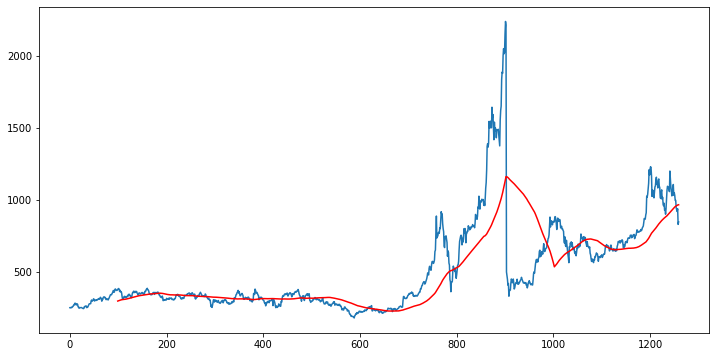

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma100, 'r')

In [ ]:
#moving average 
ma200=df.close.rolling(100).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1255    959.6321
1256    961.4752
1257    963.5254
1258    964.4807
1259    965.4150
Name: close, Length: 1260, dtype: float64

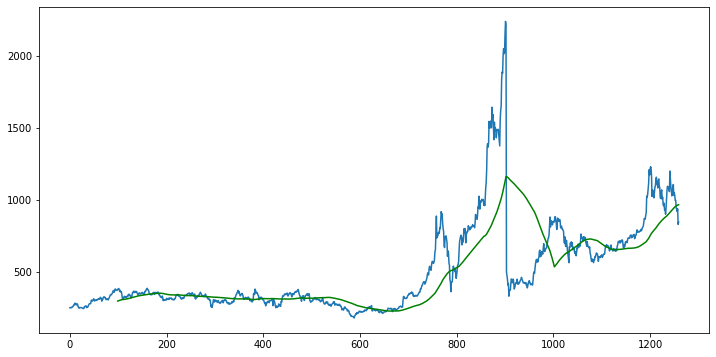

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma200,'g')


In [ ]:
df.shape #to find data column and row

(1260, 5)

In [ ]:
 #splitting data into training and testing
 training=pd.DataFrame(df['close'][0:int(len(df)*0.7)])
 testing=pd.DataFrame(df['close'][int(len(df)*0.7): int(len(df))])
 print(training.shape)
print(testing.shape)

(882, 1)
(378, 1)


In [ ]:
training.head()

,close
0,250.63
1,251.93
2,249.24
3,251.55
4,251.33


In [ ]:
testing.head()

,close
882,1430.76
883,1485.00
884,1487.00
885,1485.02
886,1489.58


In [ ]:
#scaling down the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
#to convert it into an array
training_array=scaler.fit_transform(training)
print(training_array)

[[0.04894708]
 [0.04983504]
 [0.04799765]
 [0.04957549]
 [0.04942522]
 [0.05382403]
 [0.05362595]
 [0.05676796]
 [0.06163125]
 [0.06165174]
 [0.06941798]
 [0.06967753]
 [0.06884422]
 [0.06146049]
 [0.06370088]
 [0.0672254 ]
 [0.06457518]
 [0.05260821]
 [0.05329809]
 [0.04594168]
 [0.04850993]
 [0.04853043]
 [0.04884463]
 [0.04958915]
 [0.04934325]
 [0.04755367]
 [0.04637883]
 [0.04503323]
 [0.04420674]
 [0.0459007 ]
 [0.05398113]
 [0.05243062]
 [0.05674747]
 [0.0563718 ]
 [0.05665868]
 [0.04898124]
 [0.05193883]
 [0.05178173]
 [0.05750565]
 [0.06232796]
 [0.06726638]
 [0.06721857]
 [0.06758741]
 [0.06784697]
 [0.08165816]
 [0.08519634]
 [0.07925384]
 [0.08178111]
 [0.08440401]
 [0.09113201]
 [0.0886184 ]
 [0.08051065]
 [0.08540126]
 [0.08365266]
 [0.08283983]
 [0.08643949]
 [0.08438352]
 [0.08649413]
 [0.08815393]
 [0.09208828]
 [0.08961565]
 [0.08856376]
 [0.09227953]
 [0.09826301]
 [0.09557181]
 [0.09019624]
 [0.07956804]
 [0.08837251]
 [0.08758017]
 [0.09719063]
 [0.09989549]
 [0.09

In [ ]:
training_array.shape

(882, 1)

In [ ]:
x_train = []
y_train = []

for i in range(100,training_array.shape[0]):
  x_train.append(training_array[i-100: i])
  y_train.append(training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(782, 100, 1)

#ML MODEL

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
#model is sequential, then we set up our LSTM LAYERS, Sequential model is a linear stack of layers.
#the units -- poaitive integer that is dimention of the output space, what's going out into the next layer
#so basically even if we have 50 inputs, we will be having 60 outputs
#relu is a common activation unit for convuational layers, 
#Applies the rectified linear unit activation function.
#With default values, this returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor.
#return data in sequence == truw
#1,1 to tell Sequential what model to use, in what format 
#dropout layer == we can overtrain our data, so basically it will become rattu tota and ONLY print what it KNOWS, 0 prediction
#20%==0.2 (random) of our neurons are just going to be turned off at all times to train other ones

model = Sequential()
model.add(LSTM(units=50,activation="relu", return_sequences=True, 
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation="relu",return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation="relu", return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))

#this is output layer 
model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_17 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_21 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_18 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_22 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_19 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_23 (LSTM)              (None, 120)              

In [ ]:
#compiling our data, adam is used as its most common optimizer in big data
#mean squared error = os the error in our model 
#epochs are how many times we are going over the data 
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 11s 267ms/step - loss: 0.0301
Epoch 2/50
25/25 [==============================] - 7s 266ms/step - loss: 0.0081
Epoch 3/50
25/25 [==============================] - 7s 267ms/step - loss: 0.0055
Epoch 4/50
25/25 [==============================] - 7s 267ms/step - loss: 0.0046
Epoch 5/50
25/25 [==============================] - 7s 267ms/step - loss: 0.0042
Epoch 6/50
25/25 [==============================] - 7s 268ms/step - loss: 0.0046
Epoch 7/50
25/25 [==============================] - 7s 267ms/step - loss: 0.0049
Epoch 8/50
25/25 [==============================] - 7s 269ms/step - loss: 0.0050
Epoch 9/50
25/25 [==============================] - 7s 268ms/step - loss: 0.0050
Epoch 10/50
25/25 [==============================] - 7s 267ms/step - loss: 0.0038
Epoch 11/50
25/25 [==============================] - 7s 268ms/step - loss: 0.0050
Epoch 12/50
25/25 [==============================] - 7s 266ms/step - loss: 0.0051
Epoch 13/50
25/25 [=====

In [ ]:
model.save('keras_model.h5')

In [ ]:
testing.head()

,close
882,1430.76
883,1485.00
884,1487.00
885,1485.02
886,1489.58


In [ ]:
training.tail(10)

,close
872,1500.84
873,1643.00
874,1568.36
875,1592.33
876,1513.07
877,1417.00
878,1539.60
879,1476.49
880,1499.11
881,1487.49


In [ ]:
past_100_days= training.tail(100)


In [ ]:
final_df = past_100_days.append(testing, ignore_index=True)

In [ ]:
final_df.tail()

,close
473,930.00
474,918.40
475,937.41
476,829.10
477,846.35


In [ ]:
#again scale it down
input_data = scaler.fit_transform(final_df)
input_data

array([[0.1651105 ],
       [0.15929454],
       [0.12068911],
       [0.11339034],
       [0.06018213],
       [0.05239083],
       [0.01624802],
       [0.05104949],
       [0.05099186],
       [0.05453383],
       [0.09158309],
       [0.10952875],
       [0.10371803],
       [0.09648737],
       [0.09007933],
       [0.10153835],
       [0.07930146],
       [0.06510736],
       [0.07848932],
       [0.09747241],
       [0.11277731],
       [0.11455353],
       [0.12721242],
       [0.16805516],
       [0.19893741],
       [0.20938518],
       [0.2174437 ],
       [0.22199168],
       [0.21804626],
       [0.18679724],
       [0.21057981],
       [0.19670533],
       [0.20693305],
       [0.24549656],
       [0.2299716 ],
       [0.24641873],
       [0.23665734],
       [0.19444706],
       [0.22581659],
       [0.2294948 ],
       [0.23702411],
       [0.23569325],
       [0.25632683],
       [0.25206703],
       [0.25108198],
       [0.2414149 ],
       [0.2478963 ],
       [0.245

In [ ]:
input_data.shape

(478, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])



In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(378, 100, 1)
(378,)


In [ ]:
#Making Predicitions
y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

(378, 1)

In [ ]:
#scale the values back 
scaler.scale_

array([0.00052396])

In [ ]:
scale_factor=1/0.00052396
y_predicted= y_predicted* scale_factor
y_test = y_test * scale_factor


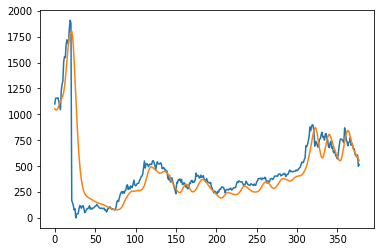

In [ ]:
plt.plot(y_test)
plt.plot(y_predicted)
plt.show()